In [5]:
def rk4(n, t_initial, t_final, y_initial, f):
    h = (t_final - t_initial) / n
    t_val = [t_initial]
    y_val = [y_initial]

    for i in range(n):
        yi = y_val[-1]
        ti = t_val[-1]

        k1 = h * f(yi, ti)
        k2 = h * f(yi + (k1/2), ti + (h/2))
        k3 = h * f(yi + (k2/2), ti + (h/2))
        k4 = h * f(yi + k3, ti + h)

        y_update = yi + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t_update = ti + h

        t_val.append(t_update)
        y_val.append(y_update)

    return t_val, y_val

def f(y, t):
    return 1 - t**2 + y


t_values, y_values = rk4(10, 0, 2, 0.5, f)
for t, y in zip(t_values, y_values):
    print(f"At t = {t:.2f}, y = {y:.6f} \n")


At t = 0.00, y = 0.500000 

At t = 0.20, y = 0.829293 

At t = 0.40, y = 1.214076 

At t = 0.60, y = 1.648922 

At t = 0.80, y = 2.127203 

At t = 1.00, y = 2.640823 

At t = 1.20, y = 3.179894 

At t = 1.40, y = 3.732340 

At t = 1.60, y = 4.283409 

At t = 1.80, y = 4.815086 

At t = 2.00, y = 5.305363 



solving burger equation using rk4

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# viscous burger equation

# Parameters
nu = 0.1  # viscosity coefficient
L = 10.0   # length of spatial domain
N = 20   # number of grid points
dx = L / (N - 1)  # grid spacing
dt = 0.01  # time step

# Initial condition
u0 = np.sin(np.pi * np.linspace(0, L, N))

# Function representing the Burgers' equation
def f(u, t):
    # Initialize arrays to store derivatives
    du_dx = np.zeros(u.shape)  # First derivative of u w.r.t. x
    d2u_dx2 = np.zeros(u.shape)  # Second derivative of u w.r.t. x

    # Calculate first derivative du/dx using central finite differences
    for i in range(1, len(u) - 1):  # Exclude boundary points
        du_dx[i] = (u[i + 1] - u[i - 1]) / (2 * dx)

    # Calculate second derivative d^2u/dx^2 using central finite differences
    for i in range(1, len(u) - 1):  # Exclude boundary points
        d2u_dx2[i] = (u[i + 1] - 2 * u[i] + u[i - 1]) / (dx ** 2)

    # Compute the right-hand side of the Viscous Burgers' Equation

    rhs = -u * du_dx + nu * d2u_dx2

    return rhs

# Solve using RK4
t_values, u_values = rk4(20, 0, 2, u0, f)
for t, u in zip(t_values, u_values):
    print(f"At t = {t:.2f}, u = {', '.join([f'{val:.6f} ' for val in u])}")


At t = 0.00, u = 0.000000 , 0.996584 , -0.164595 , -0.969400 , 0.324699 , 0.915773 , -0.475947 , -0.837166 , 0.614213 , 0.735724 , -0.735724 , -0.614213 , 0.837166 , 0.475947 , -0.915773 , -0.324699 , 0.969400 , 0.164595 , -0.996584 , -0.000000 
At t = 0.10, u = 0.000000 , 0.936456 , -0.181035 , -0.859413 , 0.254068 , 0.910249 , -0.513987 , -0.703369 , 0.494223 , 0.767276 , -0.767276 , -0.494223 , 0.703369 , 0.513987 , -0.910249 , -0.254068 , 0.859413 , 0.181035 , -0.936456 , -0.000000 
At t = 0.20, u = 0.000000 , 0.880323 , -0.194709 , -0.767269 , 0.203842 , 0.899114 , -0.544702 , -0.599124 , 0.405771 , 0.789869 , -0.789869 , -0.405771 , 0.599124 , 0.544702 , -0.899114 , -0.203842 , 0.767269 , 0.194709 , -0.880323 , -0.000000 
At t = 0.30, u = 0.000000 , 0.827700 , -0.205750 , -0.688712 , 0.167982 , 0.884166 , -0.569006 , -0.516579 , 0.339898 , 0.805495 , -0.805495 , -0.339898 , 0.516579 , 0.569006 , -0.884166 , -0.167982 , 0.688712 , 0.205750 , -0.827700 , -0.000000 
At t = 0.40, u =

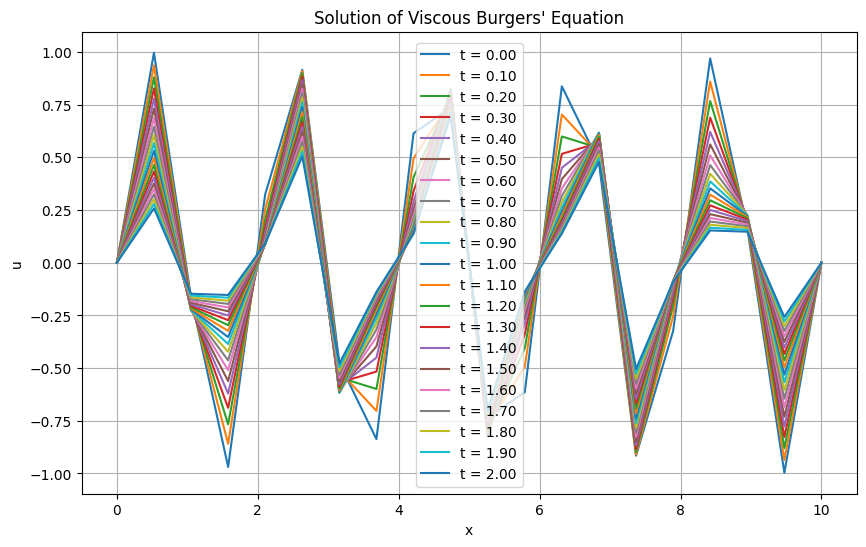

In [9]:
plt.figure(figsize=(10, 6))
for t, u in zip(t_values, u_values):
    plt.plot(np.linspace(0, L, N), u, label=f"t = {t:.2f}")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solution of Viscous Burgers\' Equation')
plt.legend()
plt.grid(True)
plt.show()